In [26]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])
"""
# make a normalized copy of df
df_min_max_scaled = df.copy()
columns = ['repo', 'cena', 'doba', 'nove', 'zobrazeni']
for column in columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	
display(df_min_max_scaled)
X= df_min_max_scaled[['datum', 'repo']]
Y= df_min_max_scaled[['aktivni']]
"""
import time
models = []
rmse_list = []
for i in range(1,7):
    timeout = time.time() + 5 
    best_rmse = 100000000000
    iteration = 0

    repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
    aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
    nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
    cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
    zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
    doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']
    #
    X = df[["datum", *repo[i-1:], *aktivni[i-1:], *nove[i-1:],*cena[i-1:], *zobrazeni[i-1:], *doba[i-1:]]]
    
    Y = df[['aktivni']]
    while time.time() < timeout:
        iteration +=1
        X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
        # Train the model on the train set
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)
        # Predict on the test set
        y_pred = linreg.predict(X_test)
        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        if rmse < best_rmse:
            best_rmse = rmse
            model = linreg
            
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the best model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    models.append(model)
    print(len(models))
    print(f"Mean absolute error: {mae:.2f}")
    print(f"Mean squared error: {mse:.2f}")
    print(f"Root mean squared error: {rmse:.2f}")
    rmse_list.append(rmse)
    #graf
    graf = False
    if graf:
        import matplotlib.pyplot as plt
        plt.plot(y_pred, label='y_pred')
        #plt.plot(y_train.values, label='y_train')
        plt.plot(y_test.values, label='y_test')
        plt.legend()
        plt.show()


1
Mean absolute error: 234.69
Mean squared error: 90151.41
Root mean squared error: 300.25
2
Mean absolute error: 293.52
Mean squared error: 169806.80
Root mean squared error: 412.08
3
Mean absolute error: 406.00
Mean squared error: 307858.09
Root mean squared error: 554.85
4
Mean absolute error: 291.28
Mean squared error: 115128.27
Root mean squared error: 339.31
5
Mean absolute error: 528.30
Mean squared error: 402164.64
Root mean squared error: 634.16
6
Mean absolute error: 568.66
Mean squared error: 482908.64
Root mean squared error: 694.92
CPU times: total: 19.8 s
Wall time: 30.2 s


In [28]:
# Ulozit model
#ulozit model
import pickle
i=1
for model in models:
    filename = f'finalized_model_longterm1_{i}.sav'
    pickle.dump(model, open(filename, 'wb'))
    #ulozit rmse pro modely
    with open('rmse.pkl', 'wb') as file:
        pickle.dump(rmse_list, file)
    i +=1

predikce

    datum
0  202302 : 8528.20509213

    datum
1  202303 : 8334.37189294

    datum
2  202304 : 7894.80838712

    datum
3  202305 : 8223.32117515

    datum
4  202306 : 8250.20485583

    datum
5  202307 : 7450.28112883

   index   datum  predikce                  min                  max
0     96  202302      8528  [8227.952840487553]  [8828.457343777562]
1     97  202303      8334  [7922.295690570488]  [8746.448095301635]
2     98  202304      7894  [7339.958776164043]  [8449.657998067167]
3     99  202305      8223  [7884.015598837928]  [8562.626751469272]
4    100  202306      8250  [7616.040338373939]  [8884.369373284317]
5    101  202307      7450  [6755.364843827899]  [8145.197413831257]


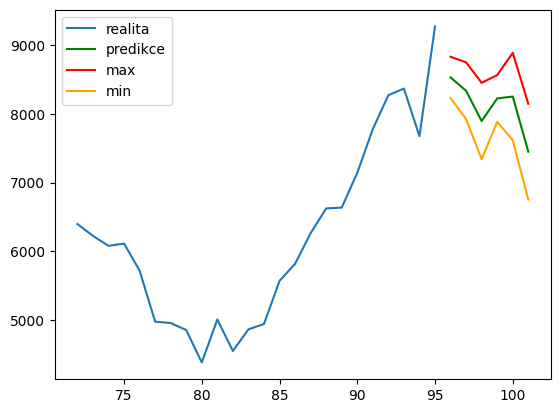

In [52]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
# definovat listy promenejch
repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']


#nacist modely
# nacist nejlepsi model
for i in range(1,len(models)):
    filename = fr'C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\finalized_model_longterm{i}.sav'
    model = pickle.load(open(filename, 'rb'))
#nacist rmse pro modely
with open('rmse.pkl', 'rb') as file:
    rmse_values = pickle.load(file)


predictions = []
for i in range(1,7):
    # vybrat spravny x promeny
    x_new = df.drop(df.index[:-12])
    x_new = x_new[["datum", *repo[i-1:], *aktivni[i-1:], *nove[i-1:],*cena[i-1:], *zobrazeni[i-1:], *doba[i-1:]]]
    # vybrat spravnej radek a ostatni odstranit
    x_new_pro_graf = x_new
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[i:])
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[:-1])
    x_new = x_new.reset_index(drop=True)
    x_new = x_new.drop(x_new.index[i:])
    x_new = x_new.drop(x_new.index[:-1])

    # vybrat spravnej model
    model = models[i-1]
    #predikce na novych datech
    y_new_pred = model.predict(x_new)
    print(f"{x_new[['datum']]} : {str(y_new_pred)[2:-2]}\n")
    
    # Create a dictionary to hold the values for each prediction
    prediction = {"index" : int(x_new_pro_graf.index.values),
                "datum": x_new["datum"].values[0],
                "predikce": int(y_new_pred[0]),
                "min": y_new_pred[0] - rmse_values[i-1],
                "max": y_new_pred[0] + rmse_values[i-1]}
    # Add the prediction to the list of predictions
    predictions.append(prediction)
    
# Create the final dataframe from the list of predictions
df_predictions = pd.DataFrame(predictions)
print(df_predictions)
#graf
plt.plot(X.index[-24:].values,Y[-24:], label='realita')
plt.plot(df_predictions['index'], df_predictions['predikce'], color="green", label="predikce")
plt.plot(df_predictions['index'], df_predictions['max'], color='red', label="max")
plt.plot(df_predictions['index'], df_predictions['min'], color="orange", label="min")
plt.legend()

